- <h1 style="background-color: navy; color: white; padding: 10px; text-align: center; border-radius: 8px; margin: 20px 0; font-family: 'Arial', sans-serif; font-weight: bold;"> Data Analysis For Predicting dengue fever outbreaks in Sri Lanka Using Python</h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [5]:
## Load dataset

lanka_wc = pd.read_csv("Sri_lanka_dengue_cases_weather_weekly_2007_2024_.csv", parse_dates = ['Week_Start_Date', 'Week_End_Date'])

lanka_p = pd.read_csv("population_data[2007-2023].csv")

In [6]:
# Weather_report/Reported Cases data

lanka_wc.head()

,District,Number_of_Cases,Week_Start_Date,Month,Year,Week,Week_End_Date,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Total Rain (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Weather Code,Avg Daylight Duration (hours),Avg Sunrise Time,Avg Sunset Time
0,Ampara,0,2007-01-01,1,2007,1,2007-01-08,26.9375,21.8625,28.8500,24.1000,8.0,8.0,18.2000,44.3,3,11.714583,376,1079
1,Ampara,0,2007-01-08,1,2007,2,2007-01-15,26.3500,23.3250,30.2625,26.7000,86.1,86.1,17.0250,43.6,53,11.733333,378,1082
2,Ampara,0,2007-01-15,1,2007,3,2007-01-22,27.2125,23.1625,29.5750,25.9625,3.1,3.1,20.1875,48.2,51,11.754167,380,1085
3,Ampara,0,2007-01-22,1,2007,4,2007-01-29,26.7250,23.0375,29.9500,26.1125,53.6,53.6,17.2000,42.5,61,11.783333,381,1088
4,Ampara,0,2007-01-29,1,2007,5,2007-02-05,27.3625,22.9625,30.7500,26.1250,8.2,8.2,17.2625,40.0,51,11.812500,382,1090


In [7]:
lanka_wc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   District                       22950 non-null  object        
 1   Number_of_Cases                22950 non-null  int64         
 2   Week_Start_Date                22950 non-null  datetime64[ns]
 3   Month                          22950 non-null  int64         
 4   Year                           22950 non-null  int64         
 5   Week                           22950 non-null  int64         
 6   Week_End_Date                  22950 non-null  datetime64[ns]
 7   Avg Max Temp (°C)              22950 non-null  float64       
 8   Avg Min Temp (°C)              22950 non-null  float64       
 9   Avg Apparent Max Temp (°C)     22950 non-null  float64       
 10  Avg Apparent Min Temp (°C)     22950 non-null  float64       
 11  Total Precipita

#### Weather_report/Reported Cases Column names description

1. `District` - The Administrative districts in Sri Lanka

2. `Number_of_Cases` - Dengue cases reported weekly 

3. `Week_Start_Date` - The Starting date for the reported cases

4. `Month` - The Month the cases were reported

5. `Year` - The Year the cases were reported

6. `Week` - The Week the cases were reported

7. `Week_End_Date` - The Ending date for the reported cases

8. `Avg Max Temp (°C)` - The Average maximum temperature measured in degree Celsius

9. `Avg Min Temp (°C)` - The Average minimum temperature measured in degree Celsius

10. `Avg Apparent Max Temp (°C)` - The Average Apparent maximum temperature measured in degree Celsius

11. `Avg Apparent Min Temp (°C)` - The Average Apparent minimum temperature measured in degree Celsius

12. `Total Precipitation (mm)` - The Total Precipitation measured in millimetres 

13. `Total Rain (mm)` - The Total Precipitation measured in millimetres

14. `Avg Wind Speed (km/h)` - The Average wind speed measured in kilometre per hour

15. `Max Wind Gusts (km/h)` - The Maximum wind gust speed measured in kilometre per hour

16. `Weather Code` - Code representing weather conditions

17. `Avg Daylight Duration (hours)` - The Average daylight duration measured in hours

18. `Avg Sunrise Time` - The Average Sunrise Time

19. `Avg Sunset Time` - The Average Sunset Time


In [8]:
# Population data

lanka_p.head()

,year,total_population,district
0,2007,2270352,Colombo
1,2008,2284182,Colombo
2,2009,2298012,Colombo
3,2010,2311842,Colombo
4,2011,2325673,Colombo


In [9]:
lanka_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              425 non-null    int64 
 1   total_population  425 non-null    int64 
 2   district          425 non-null    object
dtypes: int64(2), object(1)
memory usage: 10.1+ KB


#### Population Column names description

1. `Year` - The Year population was counted

2. `total_population` - The population Count 

3. `district` - The Administrative districts in Sri Lanka


<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> DATA CLEANING PROCESS
</span>

In [10]:
# Drop unwanted columns (Total Rain (mm), Weather Code)

lanka_wc.drop(columns = ['Total Rain (mm)', 'Weather Code'], inplace = True)
lanka_wc

,District,Number_of_Cases,Week_Start_Date,Month,Year,Week,Week_End_Date,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Avg Daylight Duration (hours),Avg Sunrise Time,Avg Sunset Time
0,Ampara,0,2007-01-01,1,2007,1,2007-01-08,26.9375,21.8625,28.8500,24.1000,8.0,18.2000,44.3,11.714583,376,1079
1,Ampara,0,2007-01-08,1,2007,2,2007-01-15,26.3500,23.3250,30.2625,26.7000,86.1,17.0250,43.6,11.733333,378,1082
2,Ampara,0,2007-01-15,1,2007,3,2007-01-22,27.2125,23.1625,29.5750,25.9625,3.1,20.1875,48.2,11.754167,380,1085
3,Ampara,0,2007-01-22,1,2007,4,2007-01-29,26.7250,23.0375,29.9500,26.1125,53.6,17.2000,42.5,11.783333,381,1088
4,Ampara,0,2007-01-29,1,2007,5,2007-02-05,27.3625,22.9625,30.7500,26.1250,8.2,17.2625,40.0,11.812500,382,1090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,Vavuniya,3,2024-06-17,6,2024,25,2024-06-24,32.6500,25.6375,35.5500,28.4000,5.7,27.3125,64.4,12.633333,350,1108
22946,Vavuniya,3,2024-06-24,6,2024,26,2024-07-01,33.0750,25.6500,35.5250,28.3500,3.5,26.9375,68.4,12.629167,351,1109
22947,Vavuniya,2,2024-07-01,7,2024,27,2024-07-08,34.1625,25.6750,37.0125,28.7750,4.1,23.6125,53.3,12.616667,353,1110
22948,Vavuniya,1,2024-07-08,7,2024,28,2024-07-15,34.0125,25.8000,36.8125,28.6375,8.0,24.4500,62.6,12.597917,355,1111


In [11]:
# Check district names between both dataframes for correlation

lanka_wc['District'].unique()

array(['Ampara', 'Anuradhapura', 'Badulla', 'Batticaloa', 'Colombo',
       'Galle', 'Gampaha', 'Hambantota', 'Jaffna', 'Kalutara', 'Kandy',
       'Kegalle', 'Kilinochchi', 'Kurunegala', 'Mannar', 'Matale',
       'Matara', 'Monaragala', 'Mullaitivu', 'NuwaraEliya', 'Polonnaruwa',
       'Puttalam', 'Ratnapura', 'Trincomalee', 'Vavuniya'], dtype=object)

In [12]:
lanka_p['district'].sort_values().unique()

array(['Ampara', 'Anuradhapura', 'Badulla', 'Batticaloa', 'Colombo',
       'Galle', 'Gampaha', 'Hambantota', 'Jaffna', 'Kalutara', 'Kandy',
       'Kegalle', 'Kilinochchi', 'Kurunegala', 'Mannar', 'Matale',
       'Matara', 'Moneragala', 'Mullaitivu', 'NuwaraEliya', 'Polonnaruwa',
       'Puttalam', 'Ratnapura', 'Trincomalee', 'Vavuniya'], dtype=object)

In [13]:
# Change 'Moneragala' to 'Monaragala' in population dataframe

lanka_p['district'] = lanka_p['district'].str.replace('Moneragala', 'Monaragala')
lanka_p['district'].sort_values().unique()

array(['Ampara', 'Anuradhapura', 'Badulla', 'Batticaloa', 'Colombo',
       'Galle', 'Gampaha', 'Hambantota', 'Jaffna', 'Kalutara', 'Kandy',
       'Kegalle', 'Kilinochchi', 'Kurunegala', 'Mannar', 'Matale',
       'Matara', 'Monaragala', 'Mullaitivu', 'NuwaraEliya', 'Polonnaruwa',
       'Puttalam', 'Ratnapura', 'Trincomalee', 'Vavuniya'], dtype=object)

<span style="background-color:DarkSlateGray;
             color:LightCyan;
             font-size:40px;
             text-align:center;
               border-radius:20px 70px;
             font-weight:bold;
              padding:25px 80px;"> ANALYZING THE DATASETS
</span>

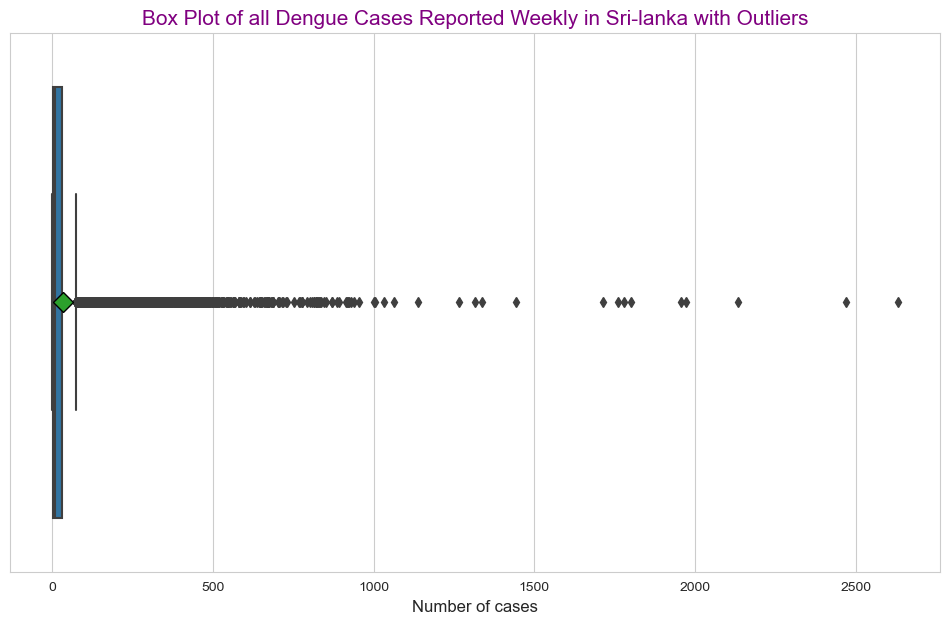

In [61]:
# Considering Sri-Lanka as a whole
# To check for outliers, we can use Boxplot and Interquartile range method to find the values of these outliers
# Using the Boxplot method
# Note - The marker in the diagram (Box Plot of all Dengue Cases Reported Weekly in Sri-lanka with Outliers) represent the average reported weekly cases value mark(35)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.boxplot(data = lanka_wc, x = 'Number_of_Cases', showmeans = True,
           meanprops={"marker": "D", "markeredgecolor": "black","markersize": "10"})

plt.title('Box Plot of all Dengue Cases Reported Weekly in Sri-lanka with Outliers', fontsize = 15, color = 'purple')
plt.xlabel('Number of cases', fontsize = 12)
plt.show()

In [69]:
# Mean of all reported weekly cases overtime (35)

lanka_wc['Number_of_Cases'].mean().round()

35.0

In [70]:
# Median of all reported weekly cases overtime (9)

lanka_wc['Number_of_Cases'].median()

9.0

## There is a positive skewed distribution in the reported weekly cases data, that means probablity of getting reported cases below average reported case of 35 overtime is high (mean > median)

Since the distribution is not normal and the data is predominantly non-negative (i.e.,
cases are zero or positive), calculating the lower bound for outlier detection isn't practical. This is
because the lower bound would be negative, which isn't meaningful in the context of reported cases.
Therefore, only the upper bound is used to identify outliers.

In [103]:
# From the image above there are alot of abnormal reported cases in the data
# We can use Interquartile range method to find the values of these outliers/anormalies (IQRange)

Q1 = lanka_wc['Number_of_Cases'].quantile(0.25)
Q3 = lanka_wc['Number_of_Cases'].quantile(0.75)

IQRange = Q3 - Q1

# Define lower and upper bound
lower_bound = Q1 - (1.5 * IQRange)
upper_bound = Q3 + (1.5 * IQRange)

# Since the lower bound would be negative, which isn't meaningful in the context of reported cases. We can only find the outliers with upper-bound values
# Identify outliers/anormalies with only the upper_bound
outliers = lanka_wc.loc[(lanka_wc['Number_of_Cases'] > upper_bound)]

outliers.sort_values('Number_of_Cases', ascending = False)

,District,Number_of_Cases,Week_Start_Date,Month,Year,Week,Week_End_Date,Avg Max Temp (°C),Avg Min Temp (°C),Avg Apparent Max Temp (°C),Avg Apparent Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Max Wind Gusts (km/h),Avg Daylight Duration (hours),Avg Sunrise Time,Avg Sunset Time
6057,Gampaha,2631,2017-07-10,7,2017,28,2017-07-17,29.2375,25.0625,33.9375,29.8750,36.9,19.1000,48.6,12.491667,360,1110
6058,Gampaha,2471,2017-07-17,7,2017,29,2017-07-24,29.6125,24.6000,34.3000,29.0625,43.3,18.2875,42.8,12.470833,361,1110
6059,Gampaha,2135,2017-07-24,7,2017,30,2017-07-31,29.2375,24.6875,33.8125,29.2750,86.6,18.5750,48.2,12.445833,362,1109
4222,Colombo,1972,2017-07-17,7,2017,29,2017-07-24,29.0500,25.5250,33.8125,29.7500,48.3,20.4375,47.2,12.462500,362,1110
4223,Colombo,1958,2017-07-24,7,2017,30,2017-07-31,28.9500,25.7250,33.3125,29.9000,84.2,22.5250,52.2,12.439583,363,1109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20904,Ratnapura,75,2020-07-27,7,2020,31,2020-08-03,28.2375,24.0625,33.7250,28.8750,168.6,14.3125,51.1,12.418750,362,1107
12345,Kurunegala,75,2014-11-17,11,2014,47,2014-11-24,27.8750,22.8750,32.3500,26.7250,85.0,13.4250,44.3,11.758333,360,1066
21084,Ratnapura,75,2024-01-01,1,2024,1,2024-01-08,29.3625,22.8375,36.2750,27.3750,106.3,7.9250,24.5,11.745833,380,1085
4285,Colombo,75,2018-10-01,10,2018,40,2018-10-08,28.2875,23.7375,34.0750,28.6625,106.4,13.3875,38.9,12.035417,357,1079


In [102]:
# Range of reported weekly cases in sri-lanka

min_whisker = np.min(lanka_wc.loc[lanka_wc['Number_of_Cases'] >= lower_bound, 'Number_of_Cases'])

max_whisker = np.max(lanka_wc.loc[lanka_wc['Number_of_Cases'] <= upper_bound, 'Number_of_Cases'])

print("Box plot range of reported weekly cases in sri-lanka:", min_whisker, "-", max_whisker)
print("Minimum value of reported weekly cases in sri-lanka:", np.min(lanka_wc['Number_of_Cases']))
print("Maximum value of reported weekly cases in sri-lanka:", np.max(lanka_wc['Number_of_Cases']))

Box plot range of reported weekly cases in sri-lanka: 0 - 74
Minimum value of reported weekly cases in sri-lanka: 0
Maximum value of reported weekly cases in sri-lanka: 2631


## With this range value, since the number of reported weekly cases in sri-lanka are usually around 0 - 74, it is safe to say an outbreak occurs in sri-lanka when the number of weekly reported cases exceeds 74

In [19]:
print(f"There are {outliers['District'].count()} abnormal cases (outbreaks) out of {lanka_wc['District'].count()} cases reported overtime in the dataset")

There are 2572 abnormal cases (outbreaks) out of 22950 cases reported overtime in the dataset


#### What could be the potential reasons for these anomalies/outbreaks?

In [20]:
# Districts where these outbreaks occur

outbreak_districts = outliers['District'].value_counts()
outbreak_districts

Colombo         626
Gampaha         373
Kandy           240
Kalutara        194
Jaffna          158
Kurunegala      136
Ratnapura       127
Galle           125
Batticaloa      116
Puttalam        106
Kegalle          88
Matara           59
Ampara           54
Trincomalee      43
Matale           33
Badulla          29
Hambantota       24
Monaragala       16
Anuradhapura      9
Vavuniya          9
Polonnaruwa       3
Mannar            2
NuwaraEliya       2
Name: District, dtype: int64

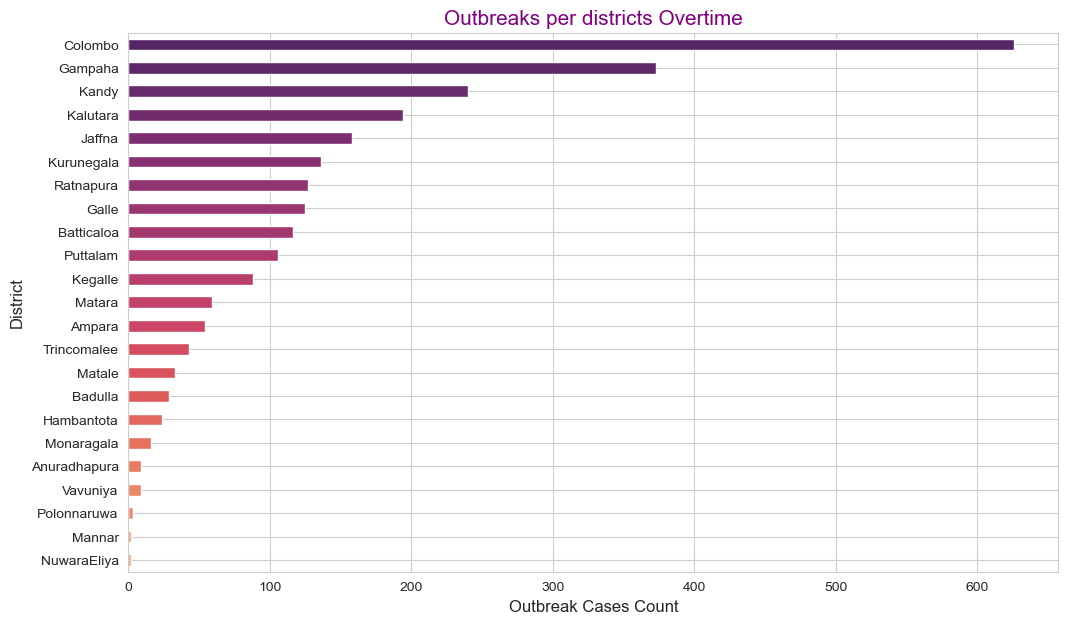

In [21]:
# Plotting districts where outbreaks occur overtime

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

outbreak_districts.sort_values().plot(kind = 'barh', color=sns.color_palette('flare', len(outbreak_districts)))

plt.title('Outbreaks per districts Overtime', fontsize = 15, color = 'purple')
plt.ylabel('District', fontsize = 12)
plt.xlabel('Outbreak Cases Count', fontsize = 12)
plt.show()

## 23 districts out of 25 in Sri-lanka have experienced outbreaks, 
## with Colombo, Gampaha and Kandy as the top 3 districts

In [72]:
# Year where these outbreaks occur

outliers_year = outliers['Year'].value_counts().sort_index()
outliers_year

2007      1
2009    101
2010     58
2011     58
2012     69
2013     55
2014    109
2015     58
2016     93
2017    530
2018    204
2019    350
2020    103
2021     48
2022    290
2023    329
2024    116
Name: Year, dtype: int64

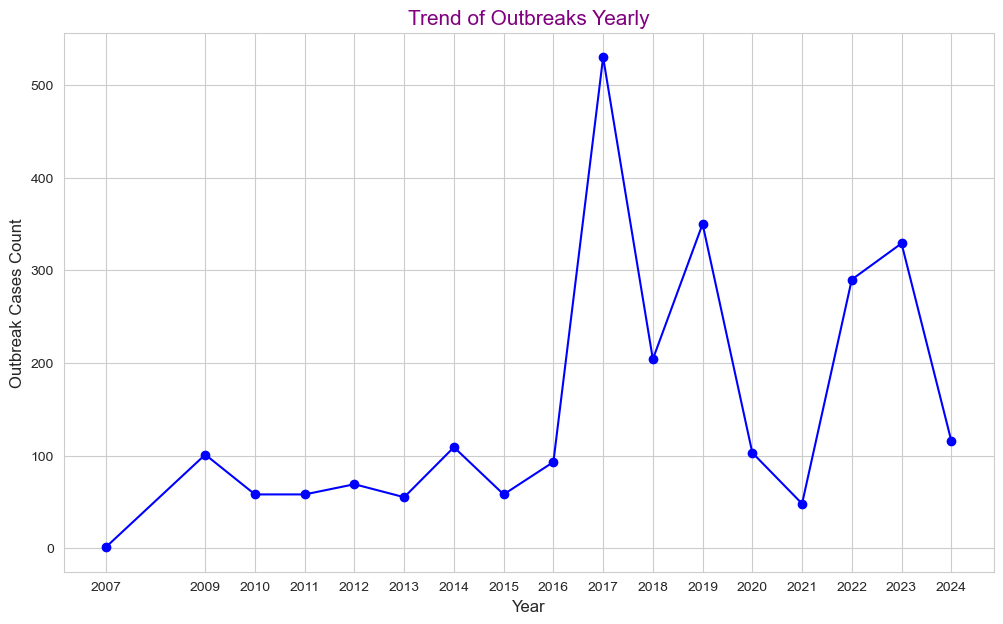

In [79]:
# Outbreaks trend yearly plot

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
plt.plot(outliers_year.index, outliers_year.values, marker='o', linestyle='-', color='b')

plt.title('Trend of Outbreaks Yearly', fontsize = 15, color = 'purple')

plt.xticks(outliers_year.index)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Outbreak Cases Count', fontsize = 12)
plt.show()

## There was no outbreak of dengue fever in 2008, the maximum and minimum amount of outbreaks occured in the year 2017 and 2007 respectively

In [24]:
# Months where these outbreaks occur (sorted monthly)

outliers['Month'].value_counts().sort_index()

1     294
2     173
3     123
4     135
5     220
6     278
7     325
8     206
9     136
10    173
11    216
12    293
Name: Month, dtype: int64

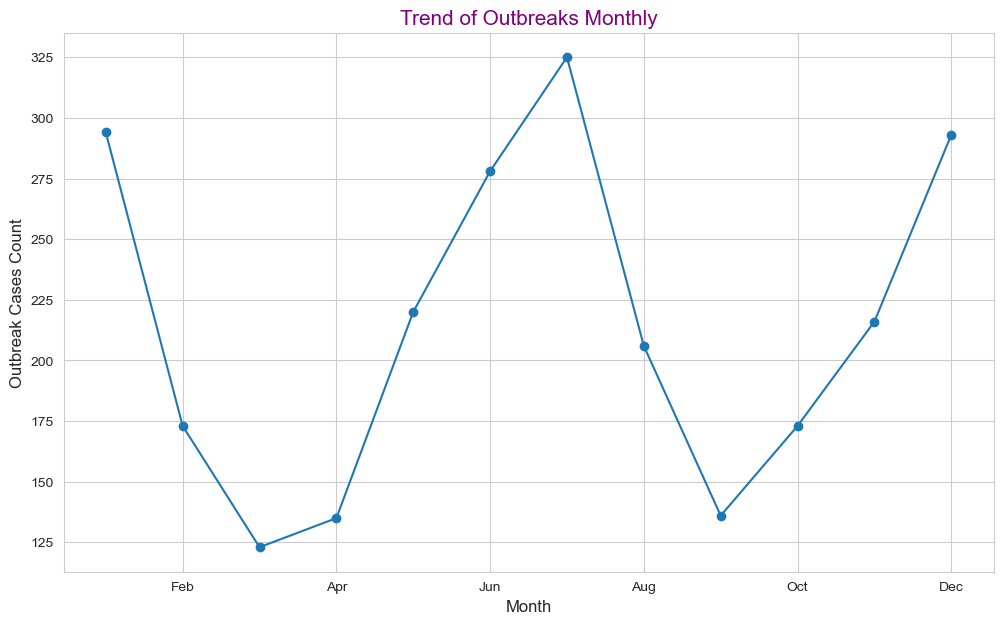

In [25]:
# Outbreaks trend monthly plot

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
outliers['Month'].value_counts().sort_index().plot(marker='o')

plt.title('Trend of Outbreaks Monthly', fontsize = 15, color = 'purple')
plt.xticks([2, 4, 6, 8, 10, 12],
          labels = ['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Outbreak Cases Count', fontsize = 12)
plt.show()

## Outbreaks in sri-lanka occur mostly in July, the least outbreaks occur in march

In [26]:
# Total outbreaks occurrence per quarter (quarterly Q1)

outliers['Month'].value_counts().sort_index().iloc[0:3].sum()

590

In [27]:
# Total outbreaks occurrence per quarter (quarterly Q2)

outliers['Month'].value_counts().sort_index().iloc[3:6].sum()

633

In [28]:
# Total outbreaks occurrence per quarter (quarterly Q4)

outliers['Month'].value_counts().sort_index().iloc[9:12].sum()

682

In [29]:
# Total outbreaks occurrence per quarter (quarterly Q3)

outliers['Month'].value_counts().sort_index().iloc[6:9].sum()

667

## Outbreaks in Sri-lanka occur mostly in the 2nd half of the year

# Note - The value of these said Outbreaks might vary per district, The 0 - 74 range was considered for sri-lanka as a whole.

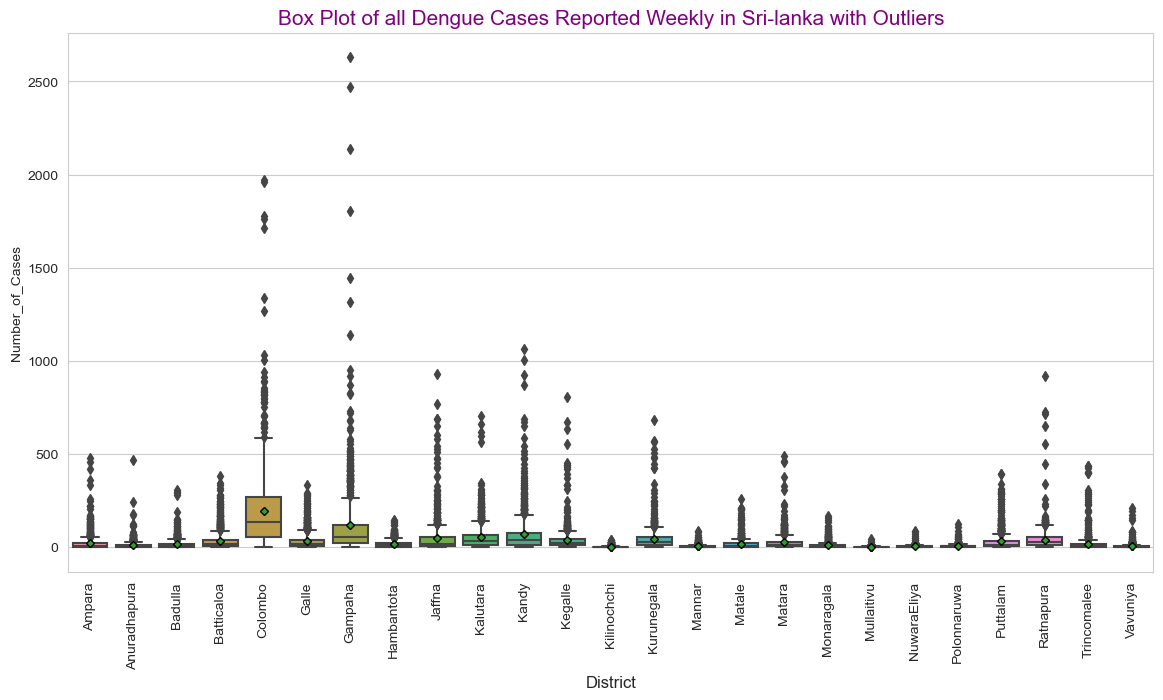

In [169]:
# Ranges to consider per districts to declare an outbreak

sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))
sns.boxplot(data = lanka_wc,  x = 'District', y = 'Number_of_Cases', showmeans = True,
           meanprops={"marker": "D", "markeredgecolor": "black","markersize": "4"})

plt.title('Box Plot of all Dengue Cases Reported Weekly in Sri-lanka with Outliers', fontsize = 15, color = 'purple')

plt.xticks(rotation = 90)
plt.xlabel('District', fontsize = 12)
plt.show()

In [190]:
# The range to consider before we call out an outbreak per district

def print_whiskers(df):
    districts = df['District'].unique()
    
    for district in districts:
        district_data = df[df['District'] == district]['Number_of_Cases']
        q1 = district_data.quantile(0.25)
        q3 = district_data.quantile(0.75)
        iqr = q3 - q1
        min_whisker = max(district_data.min(), q1 - 1.5 * iqr)
        max_whisker = min(district_data.max(), q3 + 1.5 * iqr)
        
        # Calculate outliers
        district_outliers = district_data[(district_data > max_whisker)]
        outlier_count = district_outliers.count()
        
        print(f"Box plot range of reported weekly cases in {district} is",min_whisker, "-", int(max_whisker.round()))
        print(f"The Outlier count for {district} is {outlier_count}")


In [191]:
print_whiskers(lanka_wc)

Box plot range of reported weekly cases in Ampara is 0 - 52
The Outlier count for Ampara is 85
Box plot range of reported weekly cases in Anuradhapura is 0 - 28
The Outlier count for Anuradhapura is 82
Box plot range of reported weekly cases in Badulla is 0 - 43
The Outlier count for Badulla is 82
Box plot range of reported weekly cases in Batticaloa is 0 - 89
The Outlier count for Batticaloa is 98
Box plot range of reported weekly cases in Colombo is 0 - 588
The Outlier count for Colombo is 42
Box plot range of reported weekly cases in Galle is 0 - 90
The Outlier count for Galle is 102
Box plot range of reported weekly cases in Gampaha is 0 - 266
The Outlier count for Gampaha is 109
Box plot range of reported weekly cases in Hambantota is 0 - 48
The Outlier count for Hambantota is 61
Box plot range of reported weekly cases in Jaffna is 0 - 122
The Outlier count for Jaffna is 78
Box plot range of reported weekly cases in Kalutara is 0 - 140
The Outlier count for Kalutara is 82
Box plot

# The range of weekly reported cases per district is different from 74

# For example, To consider an outbreak in Vavuniya, the weekly cases reported must be above 12|

## <span style="color:maroon; font-size:20px;"><b>2) Dengue Cases Trend Analysis in Sri-lanka</b></span> 

In [30]:
# Group by year and sum the number of cases

yearly_cases = lanka_wc.groupby(['Year'])['Number_of_Cases'].sum().reset_index()
yearly_cases.rename(columns = {'Number_of_Cases' : 'reported_cases_count'}, inplace = True)
yearly_cases

,Year,reported_cases_count
0,2007,6219
1,2008,5515
2,2009,26552
3,2010,25006
4,2011,21647
5,2012,24076
6,2013,22472
7,2014,35650
8,2015,22180
9,2016,34355


In [31]:
aaa=lanka_wc[lanka_wc["Year"] == 2017]
aaa.groupby("Month")["Number_of_Cases"].sum()

Month
1      7508
2      5774
3     10121
4     12512
5     20134
6     20985
7     48473
8     16146
9      6875
10     8466
11     8941
12     8752
Name: Number_of_Cases, dtype: int64

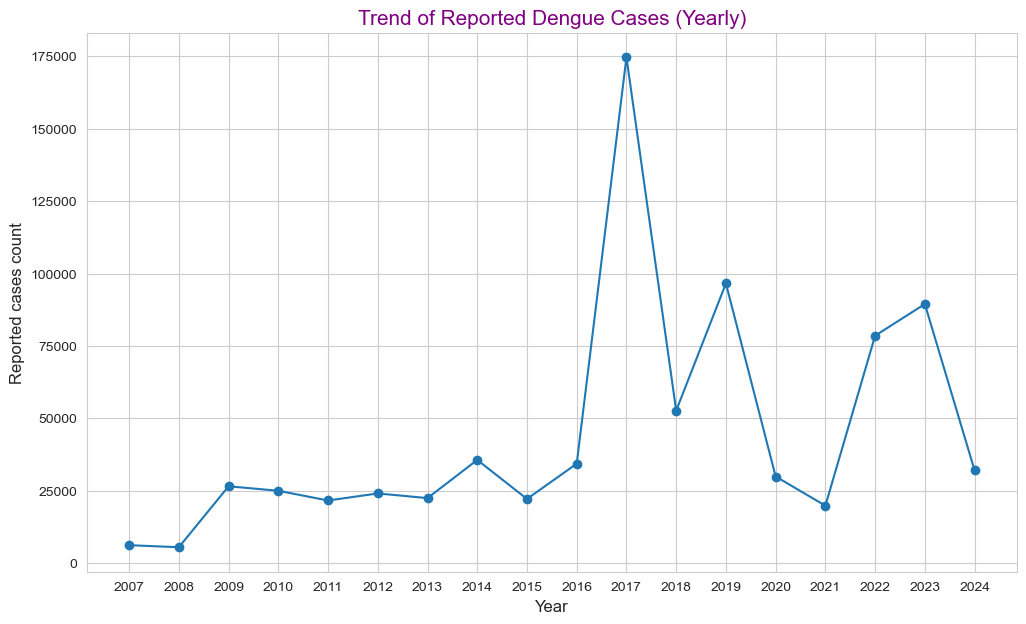

In [83]:
# The Yearly Plot trend

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
plt.plot(yearly_cases['Year'], yearly_cases['reported_cases_count'], marker='o')
plt.title('Trend of Reported Dengue Cases (Yearly)', fontsize = 15, color = 'purple')

plt.xticks(yearly_cases['Year'])
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Reported cases count', fontsize = 12)
plt.show()

## Reported cases(Total) was at its peak and lowest in the year 2017 and 2008 respectively according to the image above

In [33]:
# Group by month and sum the number of cases

monthly_cases = lanka_wc.groupby('Month')['Number_of_Cases'].sum().reset_index()
monthly_cases.rename(columns = {'Number_of_Cases' : 'reported_cases_count'}, inplace = True)
monthly_cases

,Month,reported_cases_count
0,1,85002
1,2,52741
2,3,43585
3,4,45295
4,5,65126
5,6,83554
6,7,116514
7,8,62795
8,9,40608
9,10,52892


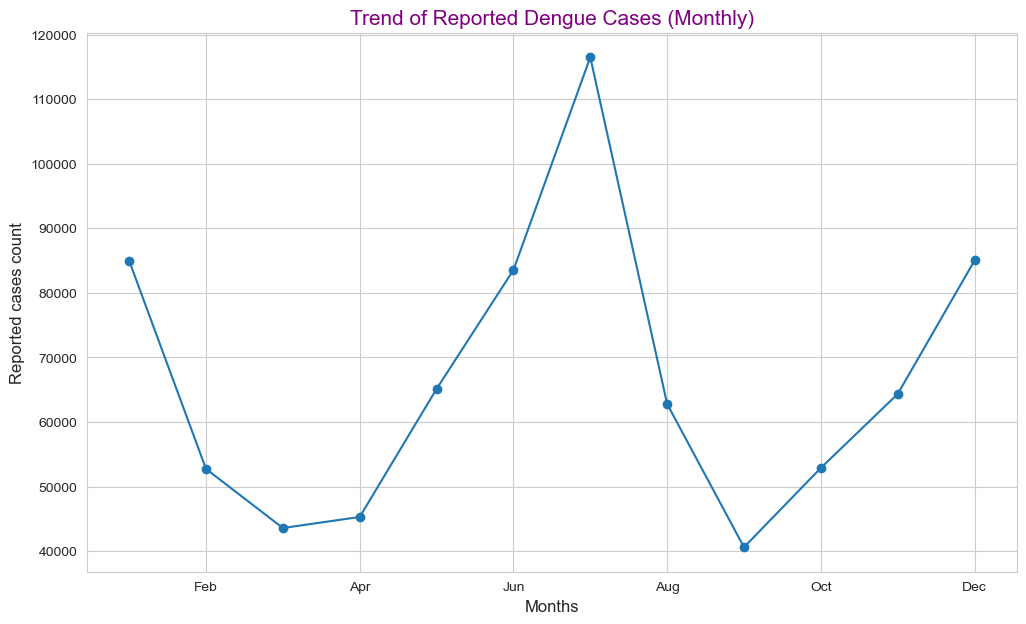

In [84]:
# The Monthly Plot

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
plt.plot(monthly_cases['Month'], monthly_cases['reported_cases_count'], marker='o')
plt.title('Trend of Reported Dengue Cases (Monthly)', fontsize = 15, color = 'purple')
plt.xticks([2, 4, 6, 8, 10, 12],
          labels = ['Feb', 'Apr', 'Jun', 'Aug', 'Oct', 'Dec'])
plt.xlabel('Months', fontsize = 12)
plt.ylabel('Reported cases count', fontsize = 12)
plt.show()

## Number of Reported cases overtime(Total) increases in the month `may to july and oct to dec` according to the image above which supports the motion in the project that says
## The disease is endemic in Sri Lanka, with peak transmission typically occurring during the monsoon seasons (May-July and October-December)
## Number of Reported cases overtime(Total) decreases during the month of `jan to mar and july to september` 

## <span style="color:maroon; font-size:20px;"><b>3) Identifying which weather parameters are most correlated with number of reported dengue cases</b></span> 

In [35]:
# Calculating the correlation between the weather parameters and the number of reported cases overtime. (correlation_matrix_btw_weather_repcases)

correlation_matrix_btw_weather_repcases = lanka_wc[['Number_of_Cases', 'Avg Max Temp (°C)', 'Avg Min Temp (°C)', 
                                  'Total Precipitation (mm)', 'Avg Wind Speed (km/h)', 'Avg Sunrise Time', 'Avg Sunset Time']].corr()

correlation_matrix_btw_weather_repcases

,Number_of_Cases,Avg Max Temp (°C),Avg Min Temp (°C),Total Precipitation (mm),Avg Wind Speed (km/h),Avg Sunrise Time,Avg Sunset Time
Number_of_Cases,1.000000,-0.034041,0.026080,0.085528,-0.013081,0.049056,0.050656
Avg Max Temp (°C),-0.034041,1.000000,0.727278,-0.368408,0.223628,-0.232681,0.268448
Avg Min Temp (°C),0.026080,0.727278,1.000000,-0.136548,0.531956,-0.298640,0.212897
Total Precipitation (mm),0.085528,-0.368408,-0.136548,1.000000,-0.229350,-0.105789,-0.334169
Avg Wind Speed (km/h),-0.013081,0.223628,0.531956,-0.229350,1.000000,-0.207942,0.323969
Avg Sunrise Time,0.049056,-0.232681,-0.298640,-0.105789,-0.207942,1.000000,-0.035524
Avg Sunset Time,0.050656,0.268448,0.212897,-0.334169,0.323969,-0.035524,1.000000


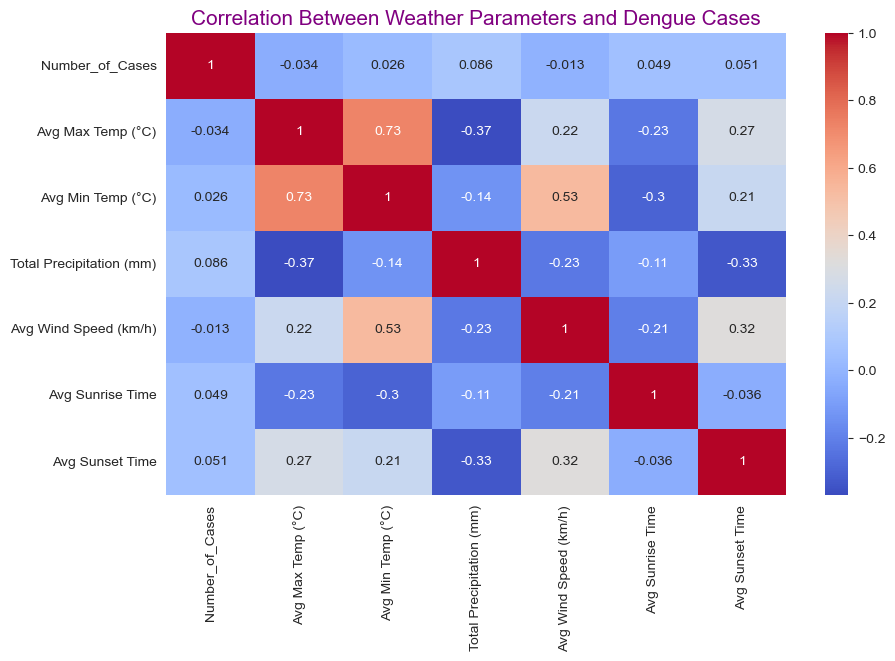

In [86]:
# The correlation plot of correlation_matrix_btw_weather_repcases

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_btw_weather_repcases, annot=True, cmap='coolwarm')
plt.title('Correlation Between Weather Parameters and Dengue Cases', fontsize = 15, color = 'purple')
plt.show()

## Number of reported dengue cases with Avg Max Temp (°C) = -0.034041: There’s a very weak negative correlation between reported dengue cases and the average maximum temperature overtime.
## Number of reported dengue cases with Avg Min Temp (°C) = 0.026080: There’s a very weak positive correlation between reported dengue cases and the average minimum temperature overtime.
## Number of reported dengue cases with Total Precipitation (mm) = 0.085528: There’s a weak positive correlation between reported dengue cases and total precipitation overtime.
## Number of reported dengue cases with Avg Wind Speed (km/h) = -0.013081: There’s a very weak negative correlation between reported dengue cases and average wind speed overtime.
## Number of reported dengue cases with Avg Sunrise Time = 0.049056: There’s a very weak positive correlation between reported dengue cases and average sunrise time overtime.
## Number of reported dengue cases with Avg Sunset Time = 0.050656: There’s a very weak positive correlation between reported dengue cases and average sunset time overtime.

## This means when these variables `(Maximum Temperature, Wind Speed)` increases, less number of cases are reported.
## It also means when these variables `(Minimum Temperature, Total Precipitation, Sunrise and Sunset time)` increases, more number of cases are reported.
## However, none of these variables show a strong correlation with the number of reported dengue cases. The relationships are all very weak, suggesting that other factors might be more significant in influencing dengue case reported.

## It's important to note that correlation does not imply causation. While the data might not show a direct linear relationship, other factors or more complex relationships could be at play. e.g Human behavior, Mosquito control measures can affect these results. Also, Heavy rainfall can create stagnant water bodies, providing breeding grounds for mosquitoes.


## <span style="color:maroon; font-size:20px;"><b>4) Total Number of Reported cases per district monthly and yearly trend</b></span> 

In [37]:
# Creating a dataframe consisting of the number of reported cases per districts monthly overtime (monthly_cases_per_district)

monthly_cases_per_district = lanka_wc.groupby(['Month', 'District'])['Number_of_Cases'].sum().reset_index()
monthly_cases_per_district.rename(columns = {'Month' : 'month', 'District' : 'district', 'Number_of_Cases' : 'reported_cases_count'}, inplace = True)
monthly_cases_per_district

,month,district,reported_cases_count
0,1,Ampara,3171
1,1,Anuradhapura,1119
2,1,Badulla,1561
3,1,Batticaloa,4675
4,1,Colombo,20120
...,...,...,...
295,12,Polonnaruwa,538
296,12,Puttalam,4296
297,12,Ratnapura,2199
298,12,Trincomalee,2228


In [38]:
# Create a Pivot table to aggregate values and variables in monthly_cases_per_district

rep_cases_per_mon_overtime = monthly_cases_per_district.pivot_table(values='reported_cases_count', index='district', columns='month', aggfunc='sum')

rep_cases_per_mon_overtime

month,1,2,3,4,5,6,7,8,9,10,11,12
district,,,,,,,,,,,,
Ampara,3171,1750,1319,1319,1952,2424,1264,677,582,905,1409,2873
Anuradhapura,1119,1009,738,638,842,1030,1527,610,432,526,717,1651
Badulla,1561,667,522,596,679,1138,2542,1308,947,1417,1911,2224
Batticaloa,4675,4000,3341,3637,3335,1947,1466,714,544,1182,2200,4253
Colombo,20120,12073,9142,9731,15069,21622,27446,13537,8450,11105,13316,18499
Galle,3080,1792,1518,1573,2711,3353,4571,2984,1789,2053,2489,2771
Gampaha,9649,5859,5637,6346,9849,12415,20167,9847,6184,7812,8438,9063
Hambantota,1253,1064,963,1134,1296,1594,2127,1219,875,930,1022,1120
Jaffna,7952,4154,2531,1929,1809,1816,1853,1322,1357,2936,5129,9592


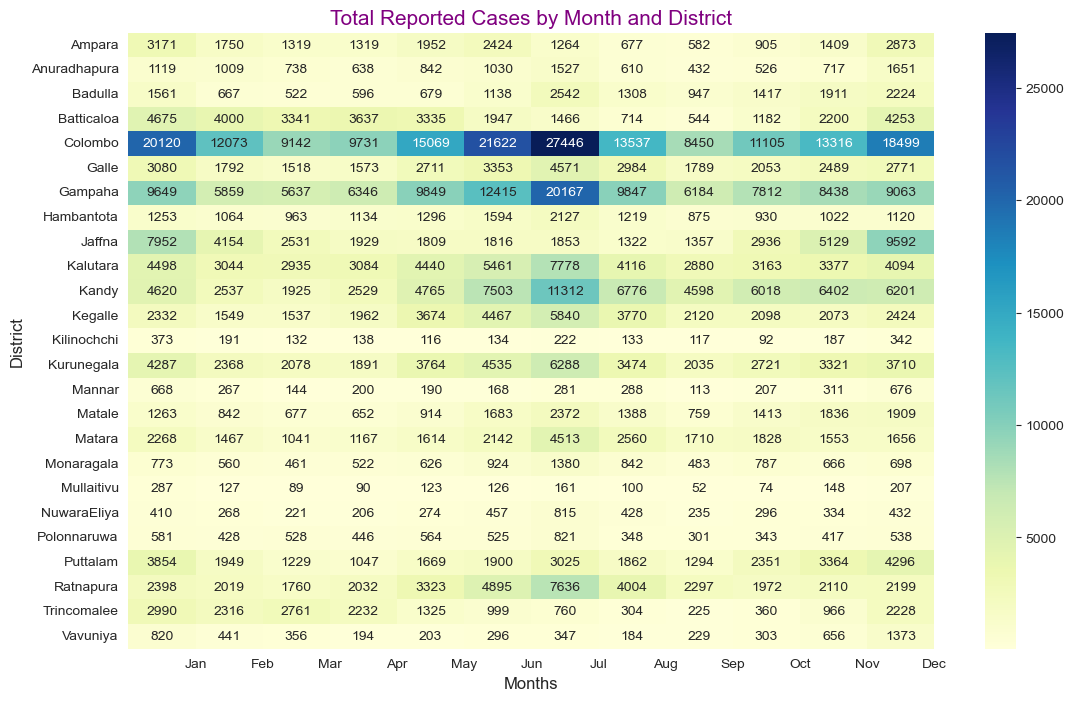

In [85]:
# Heatmap plot to show Reported Cases by Month and District Overtime

plt.figure(figsize=(13, 8))

sns.heatmap(rep_cases_per_mon_overtime, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Total Reported Cases by Month and District', fontsize = 15, color = 'purple')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Months', fontsize = 12)
plt.ylabel('District', fontsize = 12)
plt.show()

## Colombo, Gampaha and Kandy shows most number of total reported cases monthly, no wonder they experience alot of outbreaks`( Check - Outbreaks per districts Overtime above)`

In [40]:
# Creating a dataframe consisting of the number of reported cases per districts yearly (yearly_cases_per_district)

yearly_cases_per_district = lanka_wc.groupby(['Year', 'District'])['Number_of_Cases'].sum().reset_index()
yearly_cases_per_district.rename(columns = {'Year' : 'year', 'District' : 'district', 'Number_of_Cases' : 'reported_cases_count'}, inplace = True)
yearly_cases_per_district

,year,district,reported_cases_count
0,2007,Ampara,8
1,2007,Anuradhapura,237
2,2007,Badulla,80
3,2007,Batticaloa,66
4,2007,Colombo,1740
...,...,...,...
445,2024,Polonnaruwa,210
446,2024,Puttalam,820
447,2024,Ratnapura,1995
448,2024,Trincomalee,517


In [41]:
# Create a Pivot table to aggregate values and variables in yearly_cases_per_district

rep_cases_per_year_overtime = yearly_cases_per_district.pivot_table(values='reported_cases_count', index='district', columns='year', aggfunc='sum')

rep_cases_per_year_overtime

year,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
district,,,,,,,,,,,,,,,,,,
Ampara,8,47,425,484,199,184,401,529,407,478,5689,2048,1693,1275,409,2687,2025,657
Anuradhapura,237,87,560,829,229,307,376,417,252,373,2647,891,994,828,239,499,764,310
Badulla,80,91,297,912,529,240,367,922,361,860,3337,630,1880,488,803,1371,1869,475
Batticaloa,66,73,583,930,1396,569,402,873,1009,414,5057,4895,2699,3990,2951,1263,2977,1147
Colombo,1740,1420,4199,4971,7557,5756,7393,11831,8312,11228,32882,10532,20305,4211,3860,17676,18832,7405
Galle,95,94,624,955,651,730,748,785,669,1846,5417,747,6347,1175,588,3854,3920,1439
Gampaha,779,730,3216,2541,2936,3557,2705,4598,2077,2064,28694,6011,13655,2213,2140,13737,16298,3315
Hambantota,93,131,892,678,333,396,280,517,311,698,3311,1005,1964,363,443,1456,1328,398
Jaffna,117,20,189,1830,327,791,716,1844,1800,2172,5743,4302,8013,2138,414,3579,4351,4034


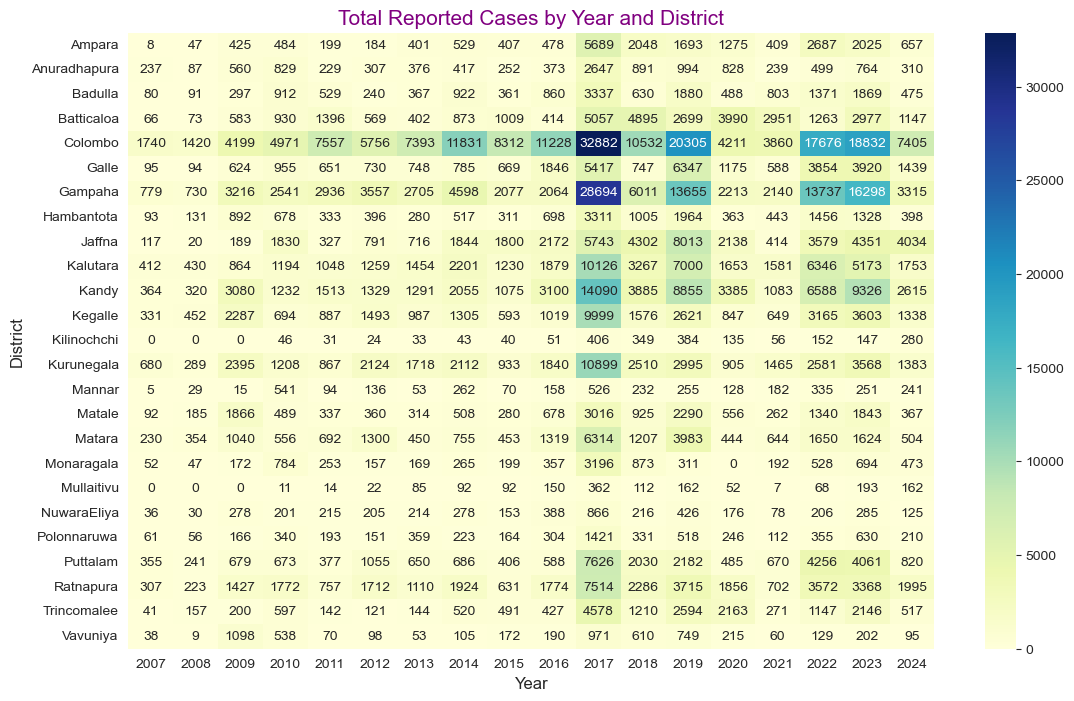

In [42]:
# Heatmap plot to show Reported Cases by Year and District

plt.figure(figsize=(13, 8))

sns.heatmap(rep_cases_per_year_overtime, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Total Reported Cases by Year and District', fontsize = 15, color = 'purple')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('District', fontsize = 12)
plt.show()

## 2017 and 2019 was really a bad year (especially in 2017) for all districts in sri-lanka, majorly all districts experienced alot of reported cases of dengue fever. This also concise with `Trend of Dengue Cases OverTime (Yearly)` diagram above

## <span style="color:maroon; font-size:20px;"><b>5) Relationship between Population and Reported Dengue Cases</b></span> 

In [43]:
# Merging the yearly_cases_per_district dataframe with the population dataframe (merged_df)
# Since there is no monthly population data, i can only merge on the year and district name
## Also note that number of cases in year 2024 is not covered, since there is o population data for it yet

merged_df = pd.merge(yearly_cases_per_district, lanka_p, on=['district', 'year'])
merged_df.rename(columns = {'Number_of_Cases' : 'reported_cases_count'}, inplace = True)
merged_df

,year,district,reported_cases_count,total_population
0,2007,Ampara,8,597939
1,2007,Anuradhapura,237,834903
2,2007,Badulla,80,790030
3,2007,Batticaloa,66,495552
4,2007,Colombo,1740,2270352
...,...,...,...,...
420,2023,Polonnaruwa,630,445000
421,2023,Puttalam,4061,845000
422,2023,Ratnapura,3368,1188000
423,2023,Trincomalee,2146,443000


In [44]:
# Calculating the correlation between the total population and the number of reported cases overtime. (cor_norep_p)

cor_norep_p = merged_df[['reported_cases_count', 'total_population']].corr()
cor_norep_p

,reported_cases_count,total_population
reported_cases_count,1.000000,0.575815
total_population,0.575815,1.000000


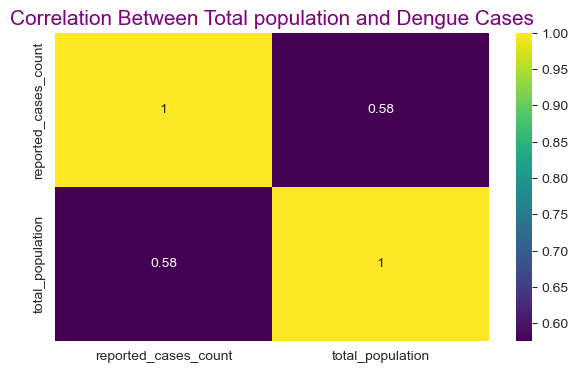

In [87]:
# The correlation plot of cor_norep_p

plt.figure(figsize=(7, 4))
sns.heatmap(cor_norep_p, annot=True, cmap = 'viridis')
plt.title('Correlation Between Total population and Dengue Cases', fontsize = 15, color = 'purple')
plt.show()

## 0.58 indicates moderately positive correlation. This means that, as the total population increases, the number of reported dengue cases also tends to increase. However, the relationship is not perfectly linear, but it is significant enough to suggest a noticeable trend

## <span style="color:maroon; font-size:20px;"><b>6) Relationship between Population and Reported dengue cases per districts overtime</b></span> 

In [88]:
# Wrote a function to know the effect of population on reported cases per district and also print out their correlation values (plot_cases_by_district)
# Note : You can Hover your mouse over the bubble plot to show its values

def plot_cases_by_district(merged_df, district_name):
    # Filter the dataframe for the specified district
    district_df = merged_df[merged_df['district'] == district_name]
    
    # Creating the bubble plot
    fig = px.scatter(district_df, x='total_population', y='reported_cases_count', size='reported_cases_count', color='district',
                     hover_name='year', size_max=40)
    
    # layout
    fig.update_layout(title={'text': f'Relationship between Population and Reported dengue cases in {district_name} District',
                             'font': {'size': 24, 'color': 'purple'}},
                      xaxis_title={'text': 'Total Population Overtime',
                                   'font': {'size': 18}},
                      yaxis_title={'text': 'Number of Cases Overtime',
                                   'font': {'size': 18}},
                      width=1200,
                      height=600)
    
    # Show the plot
    fig.show()
    
    processed_pairs = set()

    
    # Calculate correlation values
    correlation_matrix = district_df[['year', 'reported_cases_count', 'total_population']].corr()
    
    # Track processed pairs to avoid duplicates
    processed_pairs = set()
    
    # Check for correlations and print the appropriate message
    for col1 in correlation_matrix.columns:
        for col2 in correlation_matrix.columns:
            if col1 != col2 and (col2, col1) not in processed_pairs:
                correlation_value = correlation_matrix.loc[col1, col2]
                if 0.7 <= correlation_value <= 1:
                    print(f'Strong positive correlation between {col1} and {col2} in {district_name}: {correlation_value:.2f}')
                elif 0.3 <= correlation_value < 0.7:
                    print(f'Moderate positive correlation between {col1} and {col2} in {district_name}: {correlation_value:.2f}')
                elif 0 <= correlation_value < 0.3:
                    print(f'Weak positive correlation between {col1} and {col2} in {district_name}: {correlation_value:.2f}')
                elif -0.3 <= correlation_value < 0:
                    print(f'Weak negative correlation between {col1} and {col2} in {district_name}: {correlation_value:.2f}')
                elif -0.7 <= correlation_value < -0.3:
                    print(f'Moderate negative correlation between {col1} and {col2} in {district_name}: {correlation_value:.2f}')
                elif -1 <= correlation_value < -0.7:
                    print(f'Strong negative correlation between {col1} and {col2} in {district_name}: {correlation_value:.2f}')
                
                # Mark this pair as processed
                processed_pairs.add((col1, col2))

In [89]:
# Showing all the districts name (Use any with the function)

merged_df['district'].unique()

array(['Ampara', 'Anuradhapura', 'Badulla', 'Batticaloa', 'Colombo',
       'Galle', 'Gampaha', 'Hambantota', 'Jaffna', 'Kalutara', 'Kandy',
       'Kegalle', 'Kilinochchi', 'Kurunegala', 'Mannar', 'Matale',
       'Matara', 'Monaragala', 'Mullaitivu', 'NuwaraEliya', 'Polonnaruwa',
       'Puttalam', 'Ratnapura', 'Trincomalee', 'Vavuniya'], dtype=object)

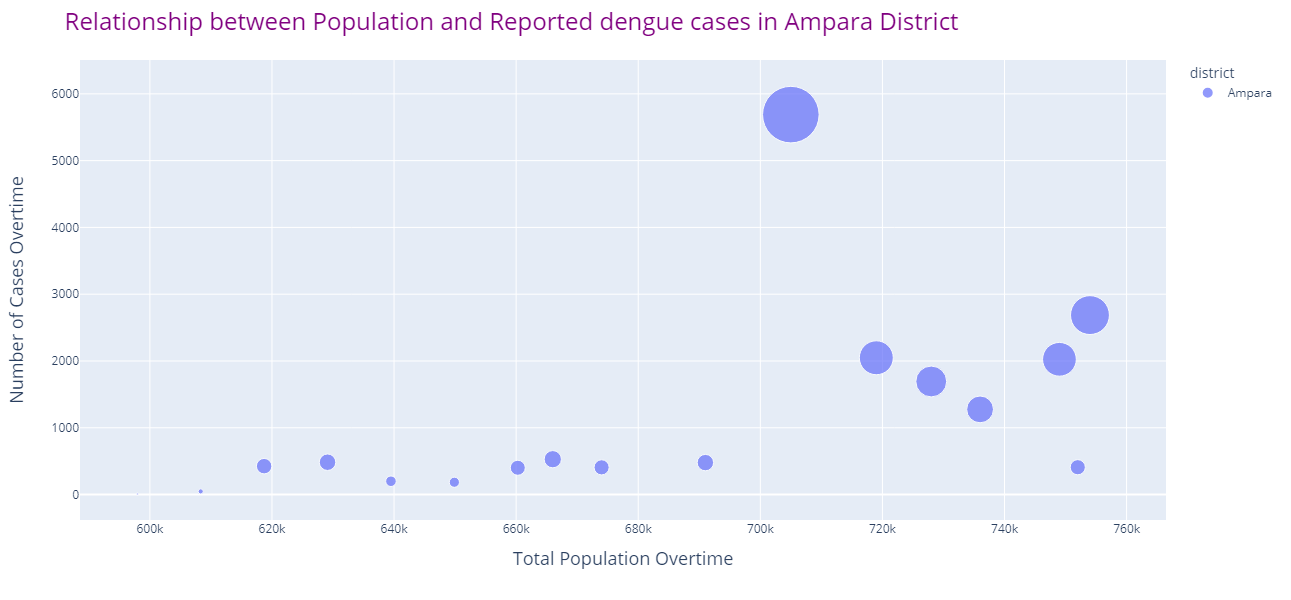

Moderate positive correlation between year and reported_cases_count in Ampara: 0.52
Strong positive correlation between year and total_population in Ampara: 0.99
Moderate positive correlation between reported_cases_count and total_population in Ampara: 0.53


In [90]:
# Slot in any of the district to get your result (For example - Ampara and Vavuniya)

plot_cases_by_district(merged_df, 'Ampara')

## These shows that in Ampara district Overtime, There is a positive relationship between Number of reported Cases and total number of population, it's not really strong but moderate, the more the number of population increases, the more the number of reported cases

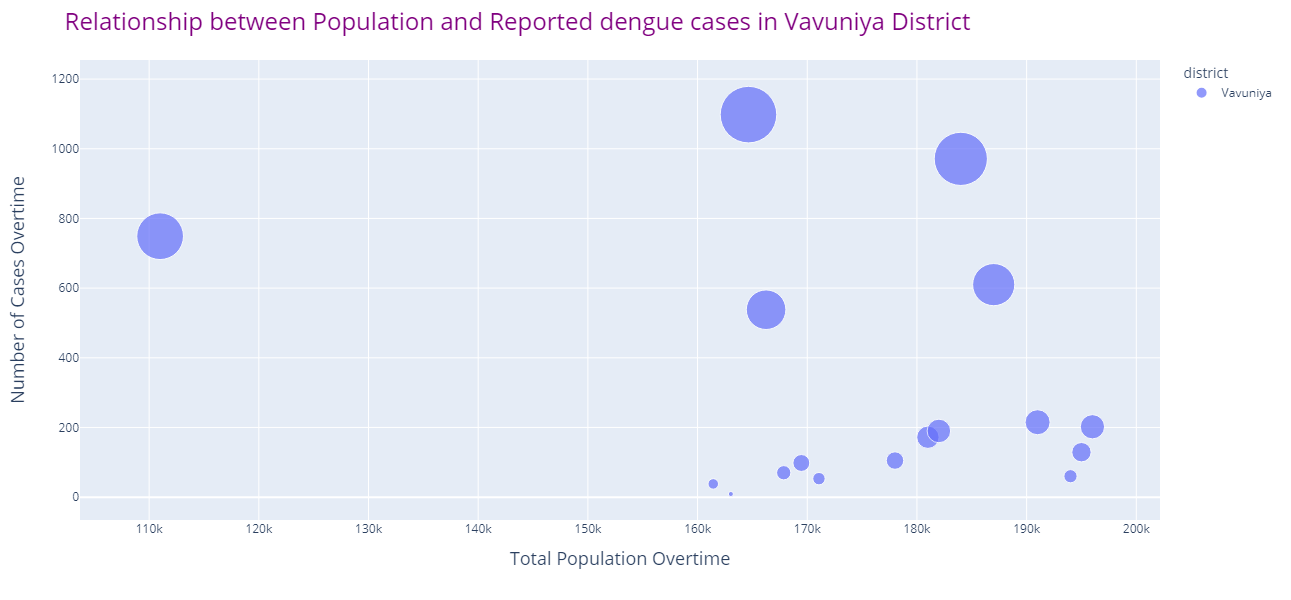

Weak positive correlation between year and reported_cases_count in Vavuniya: 0.02
Moderate positive correlation between year and total_population in Vavuniya: 0.40
Weak negative correlation between reported_cases_count and total_population in Vavuniya: -0.29


In [91]:
# For Vavuniya

plot_cases_by_district(merged_df, 'Vavuniya')

## These shows that in Vavuniya district Overtime, There is a slight negative relationship, meaning that as total number of population increases, Number of reported Cases tends to decrease.

## Note: You can choose any district to find our the effect of population on dengue reported cases per district overtime by using the function `(plot_cases_by_district(merged_df, 'district_name'))`

## <span style="color:maroon; font-size:20px;"><b>7) Effect of population on Reported Dengue cases per capita/head in different districts</b></span> 

In [50]:
# Calculate cases per head/capita
# Note : I used cases per capita to show effect because It allows for a fair comparison between districts with different population sizes and the spread of reported cases.

merged_df['Reported_cases_Per_head'] = merged_df['reported_cases_count'] / merged_df['total_population']
merged_df

,year,district,reported_cases_count,total_population,Reported_cases_Per_head
0,2007,Ampara,8,597939,0.000013
1,2007,Anuradhapura,237,834903,0.000284
2,2007,Badulla,80,790030,0.000101
3,2007,Batticaloa,66,495552,0.000133
4,2007,Colombo,1740,2270352,0.000766
...,...,...,...,...,...
420,2023,Polonnaruwa,630,445000,0.001416
421,2023,Puttalam,4061,845000,0.004806
422,2023,Ratnapura,3368,1188000,0.002835
423,2023,Trincomalee,2146,443000,0.004844


In [51]:
# Group by district and average the cases per capita

avg_cases_per_head = merged_df.groupby('district')['Reported_cases_Per_head'].mean().reset_index()
column_mapper = {'Reported_cases_Per_head' : 'avg_Reported_cases_Per_head'}
avg_cases_per_head.rename(columns = column_mapper, inplace = True)
avg_cases_per_head

,district,avg_Reported_cases_Per_head
0,Ampara,0.001566
1,Anuradhapura,0.000681
2,Badulla,0.001024
3,Batticaloa,0.003145
4,Colombo,0.004218
5,Galle,0.001539
6,Gampaha,0.002654
7,Hambantota,0.001298
8,Jaffna,0.003693
9,Kalutara,0.002180


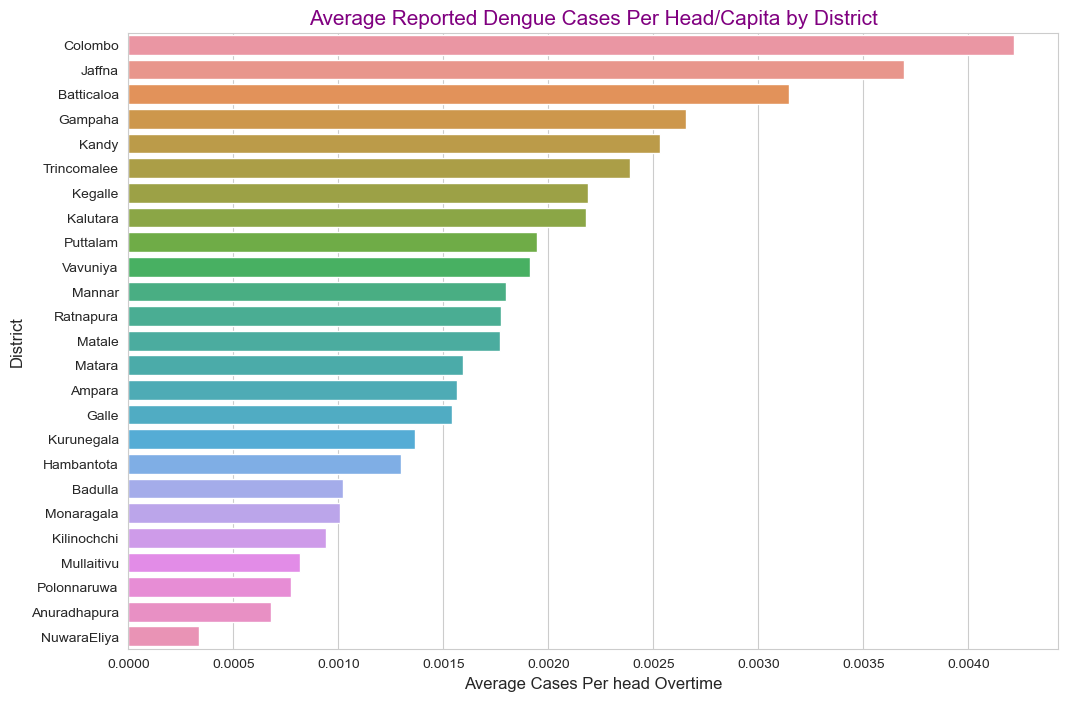

In [193]:
# Plotting the Average Reported Dengue Cases Per head by District

plt.figure(figsize=(12, 8))
sns.barplot(x='avg_Reported_cases_Per_head', y='district', data = avg_cases_per_head.sort_values('avg_Reported_cases_Per_head', ascending=False))
plt.title('Average Reported Dengue Cases Per Head/Capita by District', fontsize = 15, color = 'purple')
plt.xlabel('Average Cases Per head Overtime', fontsize = 12)
plt.ylabel('District', fontsize = 12)
plt.show()

## The top 3 districts for Average Reported Dengue Cases Per Head/Capita are Colombo, Jaffna and batticaloa, Outbreaks occur in these places too `(Check - Districts where these outbreaks occur above for proof. (The outbreaks section))`. 

## Recommendation 

In [99]:
recommendation_order = avg_cases_per_head.sort_values('avg_Reported_cases_Per_head', ascending = False)['district'].values
recommendation_order

array(['Colombo', 'Jaffna', 'Batticaloa', 'Gampaha', 'Kandy',
       'Trincomalee', 'Kegalle', 'Kalutara', 'Puttalam', 'Vavuniya',
       'Mannar', 'Ratnapura', 'Matale', 'Matara', 'Ampara', 'Galle',
       'Kurunegala', 'Hambantota', 'Badulla', 'Monaragala', 'Kilinochchi',
       'Mullaitivu', 'Polonnaruwa', 'Anuradhapura', 'NuwaraEliya'],
      dtype=object)

## Since Population shows the strongest relationship (0.58), with the number of reported cases overtime, and 
## Average reported case per capita/head directly highlights areas with the highest case burden relative to their population, this makes it easier to prioritize interventions,
## we can give preference to the districts in the diagram
## `'Average Reported Dengue Cases Per Head/Capita by District Overtime'` above by `recommendation_order` list created.
## Healthcare resources should be allocated more effectively based on the relative burden of reported cases in these districts by this order